# *Importing Modules*

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt 

# *Reading DF*

In [3]:
df=pd.read_csv(r'D:\CSV_Files\car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [4]:
df.columns=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [5]:
from sklearn.preprocessing import LabelEncoder
# encode categorical variables with ordinal encoding
LabelEncoder_=LabelEncoder()
df=df.apply(LabelEncoder().fit_transform)
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,3,3,0,0,2,2,2
1,3,3,0,0,2,0,2
2,3,3,0,0,1,1,2
3,3,3,0,0,1,2,2
4,3,3,0,0,1,0,2


# *Applying RF*

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1], test_size = 0.33, random_state = 42)
model=RandomForestClassifier()
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9596491228070175

In [17]:
model=RandomForestClassifier(n_estimators=10)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9578947368421052

In [18]:
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9631578947368421

In [19]:
model=RandomForestClassifier(n_estimators=1000)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.9631578947368421

# *Important of each Feature*

In [22]:
my_series=pd.Series(model.feature_importances_, index=x_train.columns).sort_values(ascending=False)

# *Visualize each Feature*

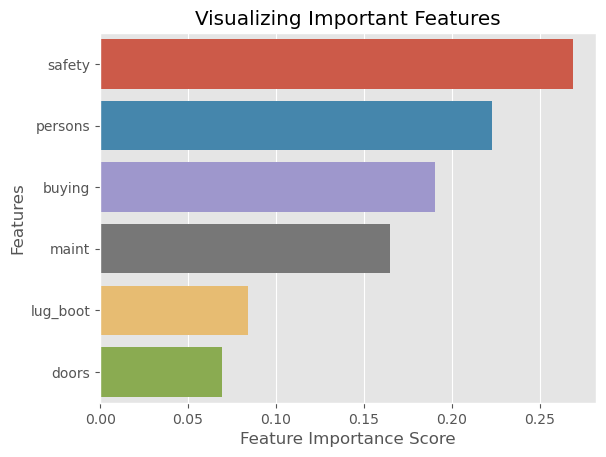

In [23]:
plt.style.use('ggplot')
sns.barplot(x=my_series.values, y=my_series.index)
# Add labels to the graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
# Add title to the graph
plt.title("Visualizing Important Features")
# Visualize the graph
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
x_train, x_test, y_train, y_test = train_test_split(df.drop(['lug_boot','doors','class'],axis=1), df.iloc[:,-1], test_size = 0.33, random_state = 42)
model=RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8614035087719298